<center>

# __Building Explanations in Natural Language__

<br>

Dr. [Jose Maria Alonso-Moral](https://citius.gal/team/jose-maria-alonso-moral/)

_Centro Singular de Investigación en Tecnoloxías Intelixentes (CiTIUS)_

_Universidade de Santiago de Compostela_

_ETSE-USC, Campus Vida, Santiago de Compostela, Spain_

<br>

Mr. [Pablo Miguel Perez-Ferreiro](https://citius.gal/team/pablo-miguel-perez-ferreiro/)

_Centro Singular de Investigación en Tecnoloxías Intelixentes (CiTIUS)_

_Universidade de Santiago de Compostela_

_ETSE-USC, Campus Vida, Santiago de Compostela, Spain_

<br>

__3 February 2026__
 
__Explainable and Trustworthy AI__

<br>

![MIA.png](MIA.png)

</center>

# 1. **Introduction**

This interactive tutorial includes supplementary material for the second TXAI in the Lab hands-on session (**I2. Building Explanations in Natural Language**) in the Subject **Explainable and Trustworthy AI** (Master in Artificial Intelligence). The session is leaded by [Jose M. Alonso-Moral](https://citius.gal/team/jose-maria-alonso-moral) and [Pablo Miguel Perez-Ferreiro](https://citius.gal/team/pablo-miguel-perez-ferreiro/) at USC, [Samuel Suárez Marcote](https://pdi.udc.es/es/File/Pdi/UA4VL![imagen.png](attachment:imagen.png)) at UDC, and [David Nicholas Olivieri Cecchi](https://www.uvigo.gal/es/universidad/administracion-personal/pdi/david-nicholas-olivieri-cecchi) at UVigo.

# 2. **Settings**

In this section, we prepare the software needed to run the notebook. Please abstain from changing anything in this section unless you're prompted to by your teachers, as it may break the notebook's functionality.

In [1]:
## this code is developed by Jose Maria Alonso-Moral and Pablo Miguel Perez-Ferreiro

# Setting Java8 is needed for compatibility with JFML (IEEE standard 1855-2016)
import os

os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
!java -version

os.system("pip install simplenlg --quiet")

openjdk version "1.8.0_472"
OpenJDK Runtime Environment (build 1.8.0_472-8u472-ga-1~22.04-b08)
OpenJDK 64-Bit Server VM (build 25.472-b08, mixed mode)


0

In [2]:
import torch, xgboost, dice_ml
print("torch:", torch.__version__)
print("cuda available:", torch.cuda.is_available())

torch: 2.7.1+cu118
cuda available: False


In [6]:
## this code is developed by Jose Maria Alonso-Moral and Pablo Miguel Perez-Ferreiro

# For your convenience, we gathered all auxiliary functions and imports in a separate file (auxiliary folder on your workspace, interactive2.py file)
from auxiliary.interactive2 import *

# 3. **An introduction to Fuzzy Sets and Systems**

In this section, we will examine how fuzzy systems can be used to generate highly explainable predictions. For this, we will:
- Define and import some pre-built fuzzy systems.
- Observe the data they were constructed on, and the general features of the systems themselves.
- Inspect how fuzzy variables actually look, and the differences that system building choices can induce in them.
- Perform inference with the systems, and check out (graphically) how that inference is being processed.
- Compare the performance of our Fuzzy Inference Systems (FIS) against alternatives seen in I1 such as decision trees.

## 3.1 Dataset

Here, we will just define the characteristics of the dataset we will be working with. In this case, we are employing the **IRIS** [dataset](https://doi.org/10.24432/C56C76). It contains 3 classes (50 instances each), referring to different types of iris plants. The dataset, while small and simple, can force models to show relatively rich behaviour due to the fact that two of the output classes are linearly separable from the third, while not being linearly separable from each other. This dataset was created by R.A. Fisher in 1988, with the reference paper being considered a classic in the field, and remains one of the most popular Machine Learning datasets to this day.

In [8]:
## this code is developed by Jose Maria Alonso-Moral and Pablo Miguel Perez-Ferreiro

# Feature/Class names for the Iris dataset, number and names of the output classes
iris_fnames = ["Sepal Length","Sepal Width","Petal Length","Petal Width"]
iris_out_target = "Class"
iris_vnames = iris_fnames + [iris_out_target]
iris_numClasses = 3
iris_class_names = ['Setosa','Versicolor','Virginica']

## 3.2 Importing the Fuzzy Inference Systems

Here, we will import the FIS themselves, and have a first look at them (and the IRIS dataset too!). All these systems were generated using the [GUAJE](https://guaje-online.app.citius.gal/) software and then exported to the IEEE standard format associated to [JFML](http://www.uco.es/JFML/software).
Regarding GUAJE, you may take a look at [GUAJE-code](https://gitlab.citius.usc.es/jose.alonso/guaje/), but also to examples provided with the following book:

* J. M. Alonso, C. Castiello, L. Magdalena, C. Mencar, C. (2021) *Explainable Fuzzy Systems: Paving the way from Interpretable Fuzzy Systems to Explainable AI Systems*, Studies in Computational Intelligence, Springer International Publishing, DOI:[10.1007/978-3-030-71098-9](http://doi.org/10.1007/978-3-030-71098-9), ISBN:978-3-030-71097-2, ISSN:1860-949X, https://gitlab.citius.usc.es/jose.alonso/bookexfs/

However, GUAJE now has an [online version](https://guaje-online.app.citius.gal/) that is easier to utilize and requires no set-up. At the end of the notebook, you will be asked to use it in order to generate your own FIS. Send an email to the Guaje Admin (guajefuzzy@gmail.com) explaining that you are a student at MIA and that you need to obtain a test account for the platform. If, for some reason, you find yourself without account or instructions, contact either your local teacher, or Jose M. Alonso/Pablo M. Perez directly.

### 3.2.1 Baseline system

We will take our baseline to be a FIS that GUAJE identifies as RP-FDTP-S. You will see this kind of syntax repeated along the notebook, so let's explain what it means:
- **RP --->** *Regular Partitions*, rather than SP (which would mean Induced Partitions)
- **FDTP --->** *Fuzzy Decision Tree Pruned*, a method for generating the fuzzy rules (there are others, such as FURIA or WM which means Wang-Mendel)
- **S --->** Linguistic *Simplification* (the alternative would be not simplifying)

In [9]:
## this code is developed by Jose Maria Alonso-Moral and Pablo Miguel Perez-Ferreiro

# Read the IRIS dataset from its raw version (it is actually a CSV, but .txt is the extension given by GUAJE and is kept for your convenience)
iris_data= pd.read_csv("testlib/IRIS/training/IRIS.txt", header=0, names=iris_vnames)
print("-----Sample of the Iris Dataset-----\n")
print(iris_data)
print("------------------------------------\n")

# This string specifies the path to the FIS definition, located on a file. Whenever you need to import one of your FIS, specify it in this way
fs_RP_FDTP_S_jfml_str_xml = "testlib/IRIS/training/IRIS.txt.kb.xml.RP.kb.xml.FDTP.kb.xml.S.kb.xml.jfml.xml"

# Importing the FIS from the file
fs_RP_FDTP_S = Py4jfml.load(fs_RP_FDTP_S_jfml_str_xml)
print(fs_RP_FDTP_S)

-----Sample of the Iris Dataset-----

     Sepal Length  Sepal Width  Petal Length  Petal Width  Class
0             5.1          3.5           1.4          0.2    1.0
1             4.9          3.0           1.4          0.2    1.0
2             4.7          3.2           1.3          0.2    1.0
3             4.6          3.1           1.5          0.2    1.0
4             5.0          3.6           1.4          0.2    1.0
..            ...          ...           ...          ...    ...
145           6.7          3.0           5.2          2.3    3.0
146           6.3          2.5           5.0          1.9    3.0
147           6.5          3.0           5.2          2.0    3.0
148           6.2          3.4           5.4          2.3    3.0
149           5.9          3.0           5.1          1.8    3.0

[150 rows x 5 columns]
------------------------------------


FUZZY SYSTEM: New Knowledge Base - MAMDANI
KNOWLEDGEBASE: 
  *Petal Length - domain[1.0, 6.9] - input
	more or less (av

---
We see above the general traits of the FIS: the Knowledge Base, which is made of fuzzy variables, and the Rule Base, which is predictably made of rules. The rules are easy enough to understand: as long as the fuzzy variables take the specified values, then the rule fires; although fuzzy logic permits richer behaviour than classical logic (e.g., more than one rule may fire, and rules may fire only partially). The fuzzy variables may warrant closer inspection:


-----Information about Fuzzy Variable: Petal Length-----

Petal Length - domain[1.0, 6.9] - input
	more or less (average) -  trapezoid [a: 1.0, b: 1.0, c: 3.95, d: 6.9]
	high -  trapezoid [a: 3.95, b: 6.9, c: 6.9, d: 6.9]



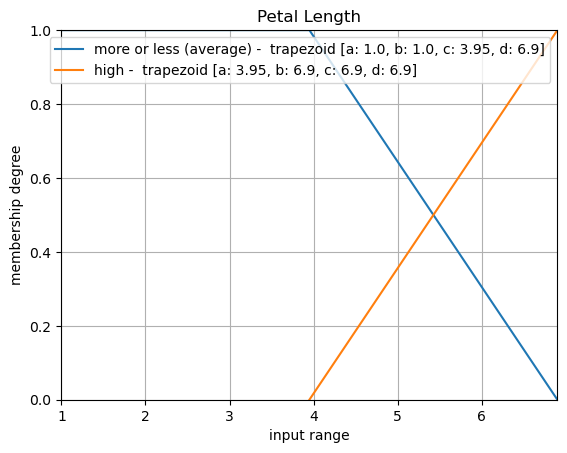

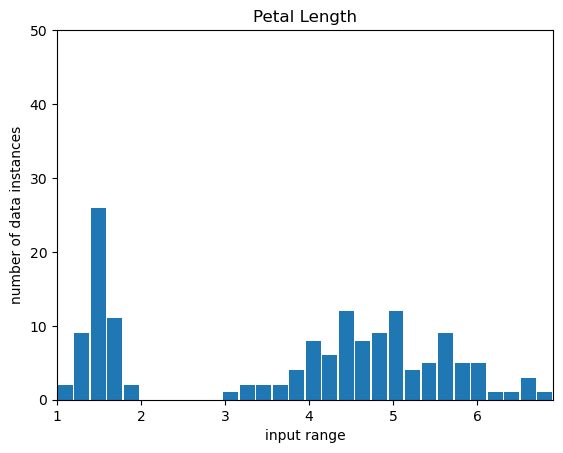


-----Information about Fuzzy Variable: Petal Width-----

Petal Width - domain[0.1, 2.5] - input
	low -  trapezoid [a: 0.1, b: 0.1, c: 0.1, d: 1.3]
	average -  triangular [a: 0.1, b: 1.3, c: 2.5]
	high -  trapezoid [a: 1.3, b: 2.5, c: 2.5, d: 2.5]



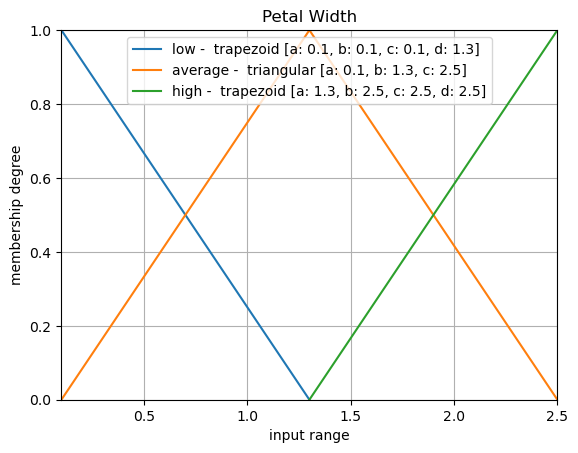

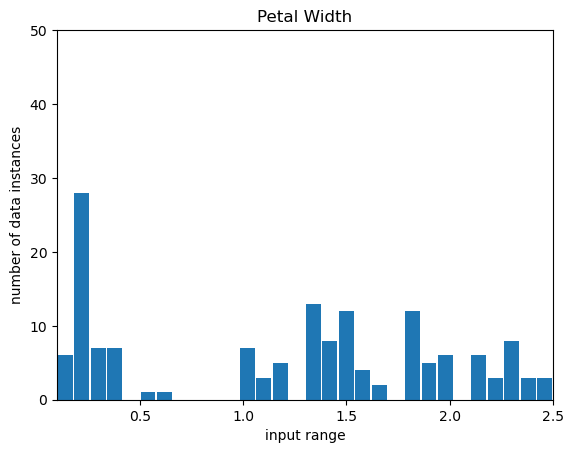


-----Information about Fuzzy Variable: Class-----

Class - domain[1.0, 3.0] - Accumulation:MAX; Defuzzifier:MOM - output
	1.0 -  singleton [a: 1.0]
	2.0 -  singleton [a: 2.0]
	3.0 -  singleton [a: 3.0]



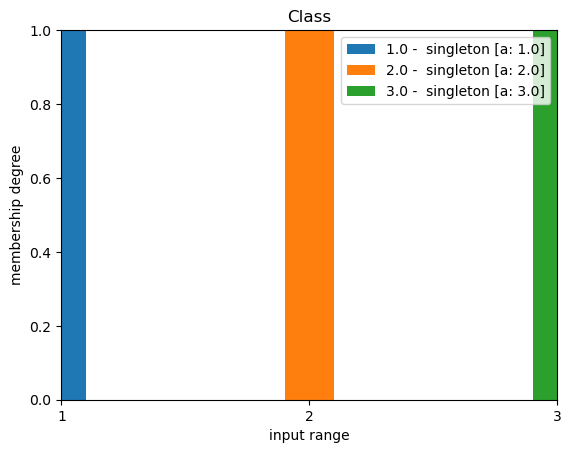

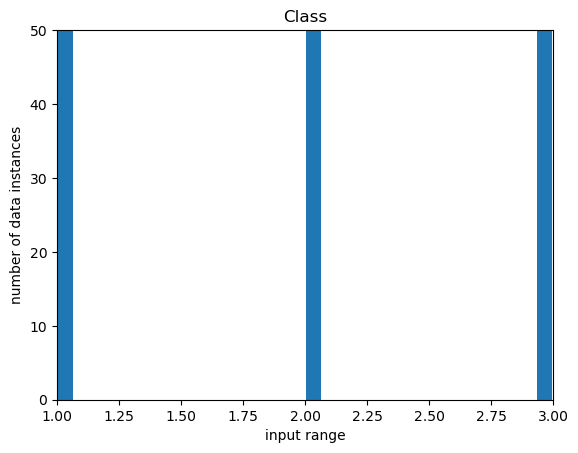

In [5]:
## this code is developed by Jose Maria Alonso-Moral and Pablo Miguel Perez-Ferreiro

# We take the variables of the FIS and plot their partitions and data distributions.
# As a general commentary, if the code structure utilized to interact with the FISs and their features seems strange to you, it may be because Py4JFML is just a Python wrapper for a Java library
# (JFML); with Java code being quite different from Python code.
for var in fs_RP_FDTP_S.getVariables():
    print(f'\n-----Information about Fuzzy Variable: {var.getName()}-----\n')
    plot_fuzzy_variable(var)
    plot_histogram(var, iris_data.get(var.getName()), 30)

#### Exercise I2.1

Observe the system we ended up with:
- It seems that we "lost" two fuzzy variables, considering that IRIS has 4 features. This is obviously an effect of simplification, but why did simplification take those two out?
- Consider the data distributions you see on the histograms for Petal Length and Petal Width. Then, consider the fuzzy partitions shown for those two variables. What do you think the system did to simplify the partitions for Length? Do you think that whatever it is, it is justified in light of the underlying data distribution?

*Tip 1: Take a look at the rule base!*
*Tip 2: Take a look at data distribution and potential correlations!*

In [6]:
# Add your code here to generate a pair plot with iris data 
# TIP: you can use the seaborn Python package and the function pairplot() and observe potential correlations among the four features and the output
# TIP: you can compute correlations with corr() function and visualize them with the function heatmap()


### 3.2.2 Alternative systems
Now, lets import and check two very close equivalents to the system we just examined: RP_FDTP, and SP_FDTP_S. According to the terminology laid down, that means:
- A FIS with regular partitions, built with a pruned fuzzy decision tree, and **with no simplification**.
- A FIS with **induced partitions**, built with a pruned fuzzy decision tree and simplified.


FUZZY SYSTEM: New Knowledge Base - MAMDANI
KNOWLEDGEBASE: 
  *Sepal Length - domain[4.3, 7.9] - input
	low -  trapezoid [a: 4.3, b: 4.3, c: 4.3, d: 6.1]
	average -  triangular [a: 4.3, b: 6.1, c: 7.9]
	high -  trapezoid [a: 6.1, b: 7.9, c: 7.9, d: 7.9]

  *Sepal Width - domain[2.0, 4.4] - input
	low -  trapezoid [a: 2.0, b: 2.0, c: 2.0, d: 3.2]
	average -  triangular [a: 2.0, b: 3.2, c: 4.4]
	high -  trapezoid [a: 3.2, b: 4.4, c: 4.4, d: 4.4]

  *Petal Length - domain[1.0, 6.9] - input
	low -  trapezoid [a: 1.0, b: 1.0, c: 1.0, d: 3.95]
	average -  triangular [a: 1.0, b: 3.95, c: 6.9]
	high -  trapezoid [a: 3.95, b: 6.9, c: 6.9, d: 6.9]

  *Petal Width - domain[0.1, 2.5] - input
	low -  trapezoid [a: 0.1, b: 0.1, c: 0.1, d: 1.3]
	average -  triangular [a: 0.1, b: 1.3, c: 2.5]
	high -  trapezoid [a: 1.3, b: 2.5, c: 2.5, d: 2.5]

  *Class - domain[1.0, 3.0] - Accumulation:MAX; Defuzzifier:MOM - output
	1.0 -  singleton [a: 1.0]
	2.0 -  singleton [a: 2.0]
	3.0 -  singleton [a: 3.0]

RULE

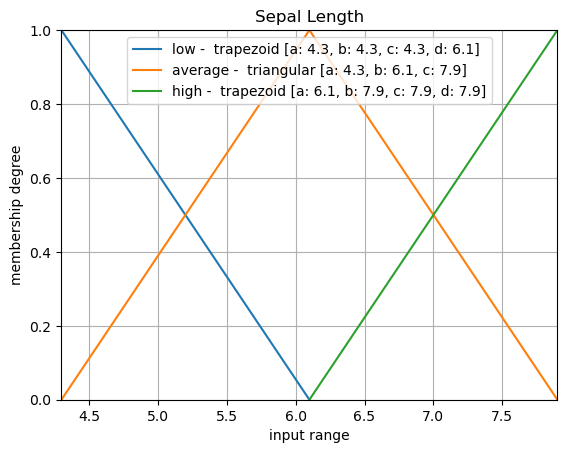

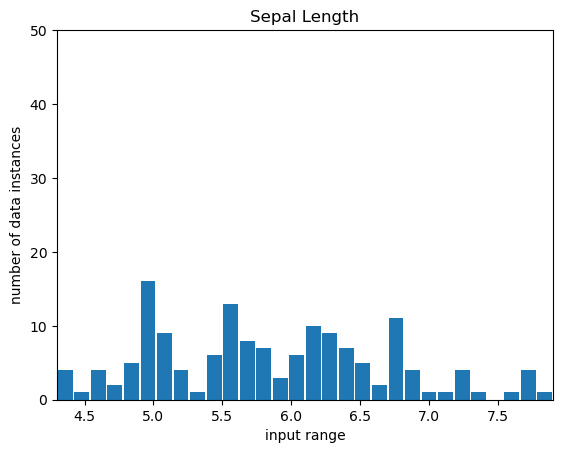


-----Information about Fuzzy Variable: Sepal Width-----

Sepal Width - domain[2.0, 4.4] - input
	low -  trapezoid [a: 2.0, b: 2.0, c: 2.0, d: 3.2]
	average -  triangular [a: 2.0, b: 3.2, c: 4.4]
	high -  trapezoid [a: 3.2, b: 4.4, c: 4.4, d: 4.4]



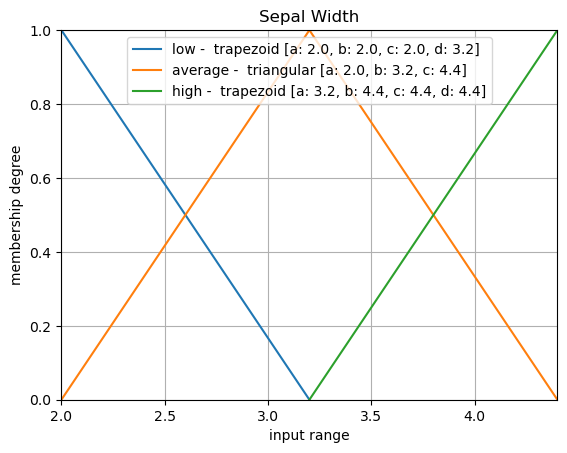

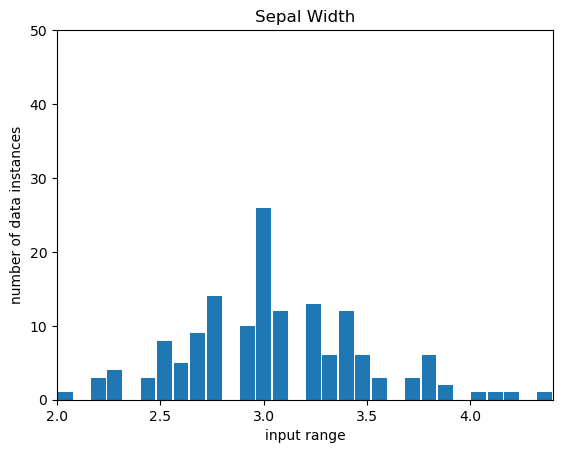


-----Information about Fuzzy Variable: Petal Length-----

Petal Length - domain[1.0, 6.9] - input
	low -  trapezoid [a: 1.0, b: 1.0, c: 1.0, d: 3.95]
	average -  triangular [a: 1.0, b: 3.95, c: 6.9]
	high -  trapezoid [a: 3.95, b: 6.9, c: 6.9, d: 6.9]



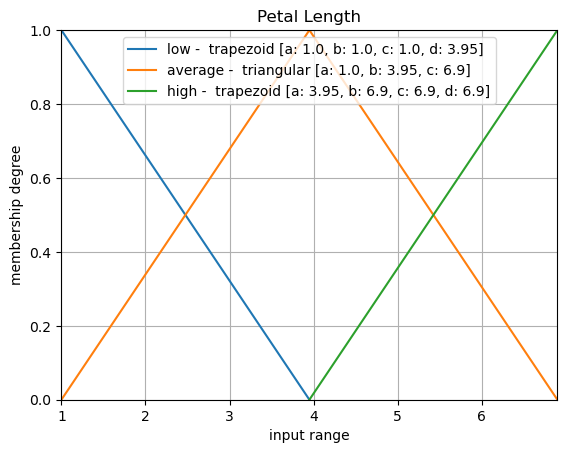

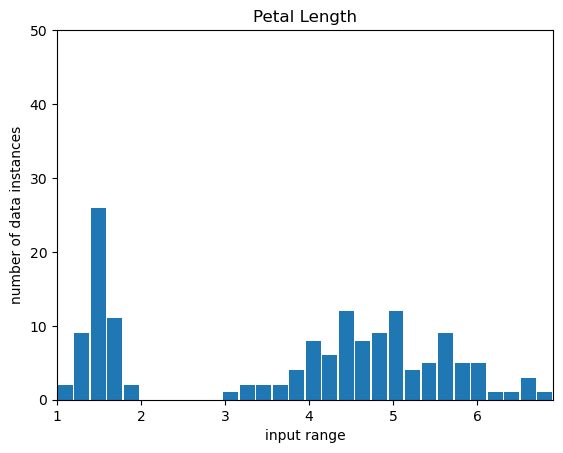


-----Information about Fuzzy Variable: Petal Width-----

Petal Width - domain[0.1, 2.5] - input
	low -  trapezoid [a: 0.1, b: 0.1, c: 0.1, d: 1.3]
	average -  triangular [a: 0.1, b: 1.3, c: 2.5]
	high -  trapezoid [a: 1.3, b: 2.5, c: 2.5, d: 2.5]



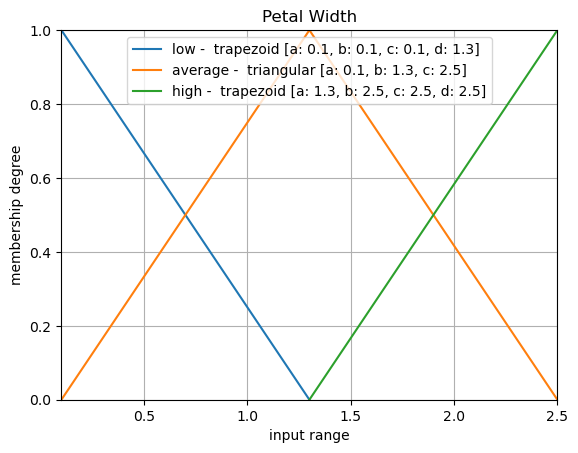

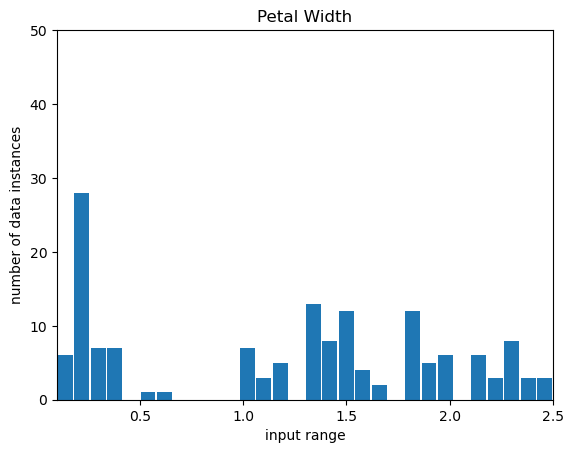


-----Information about Fuzzy Variable: Class-----

Class - domain[1.0, 3.0] - Accumulation:MAX; Defuzzifier:MOM - output
	1.0 -  singleton [a: 1.0]
	2.0 -  singleton [a: 2.0]
	3.0 -  singleton [a: 3.0]



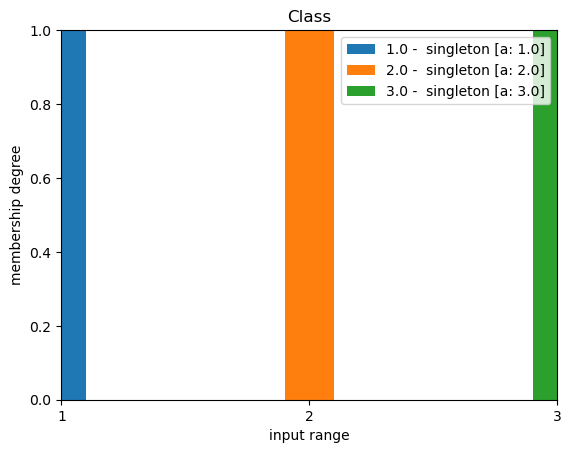

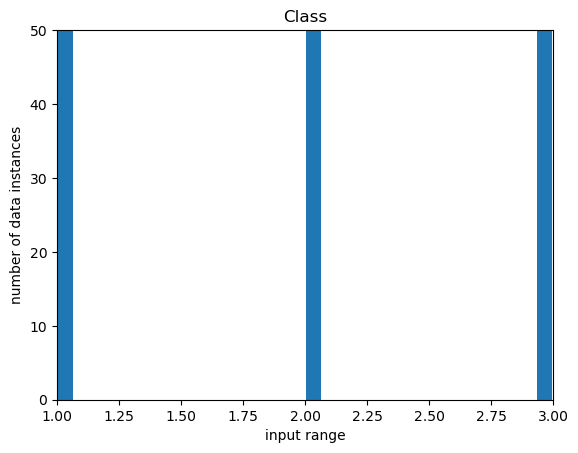

In [7]:
## this code is developed by Jose Maria Alonso-Moral and Pablo Miguel Perez-Ferreiro

# Equivalent structure, we just need to change the file path (and some names)
fs_RP_FDTP_jfml_str_xml = "testlib/IRIS/training/IRIS.txt.kb.xml.RP.kb.xml.FDTP.kb.xml.jfml.xml"

fs_RP_FDTP = Py4jfml.load(fs_RP_FDTP_jfml_str_xml)
print(fs_RP_FDTP)

for var in fs_RP_FDTP.getVariables():
    print(f'\n-----Information about Fuzzy Variable: {var.getName()}-----\n')
    plot_fuzzy_variable(var)
    plot_histogram(var, iris_data.get(var.getName()), 30)


FUZZY SYSTEM: New Knowledge Base - MAMDANI
KNOWLEDGEBASE: 
  *Petal Length - domain[1.0, 6.9] - input
	low -  trapezoid [a: 1.0, b: 1.0, c: 1.464, d: 4.432]
	average -  triangular [a: 1.464, b: 4.432, c: 5.826]
	high -  trapezoid [a: 4.432, b: 5.826, c: 6.9, d: 6.9]

  *Petal Width - domain[0.1, 2.5] - input
	more or less (average) -  trapezoid [a: 0.1, b: 0.1, c: 1.337, d: 2.074]
	high -  trapezoid [a: 1.337, b: 2.074, c: 2.5, d: 2.5]

  *Class - domain[1.0, 3.0] - Accumulation:MAX; Defuzzifier:MOM - output
	1.0 -  singleton [a: 1.0]
	2.0 -  singleton [a: 2.0]
	3.0 -  singleton [a: 3.0]

RULEBASE:
  *mamdani - rulebase-New Knowledge Base: OR=MAX; AND=MIN; ACTIVATION=MIN
	RULE 1: rule1 - (0.0) IF Petal Length IS low THEN Class IS 1.0 [weight=1.0]
	RULE 2: rule2 - (0.0) IF Petal Length IS average AND Petal Width IS more or less (average) THEN Class IS 2.0 [weight=1.0]
	RULE 3: rule3 - (0.0) IF Petal Length IS average AND Petal Width IS high THEN Class IS 3.0 [weight=1.0]
	RULE 4: rule4

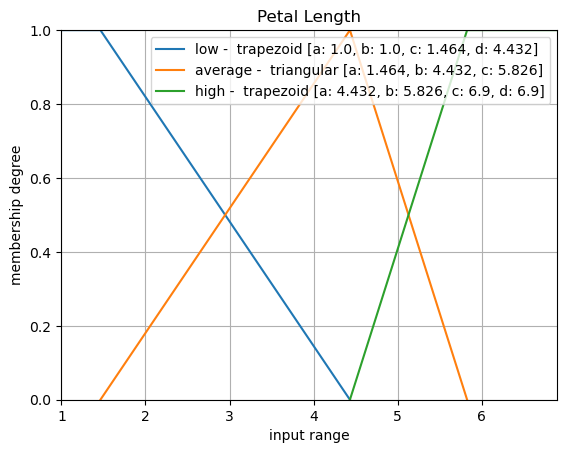

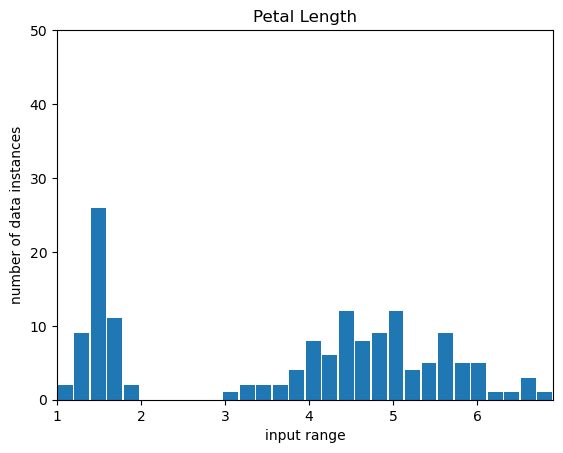


-----Information about Fuzzy Variable: Petal Width-----

Petal Width - domain[0.1, 2.5] - input
	more or less (average) -  trapezoid [a: 0.1, b: 0.1, c: 1.337, d: 2.074]
	high -  trapezoid [a: 1.337, b: 2.074, c: 2.5, d: 2.5]



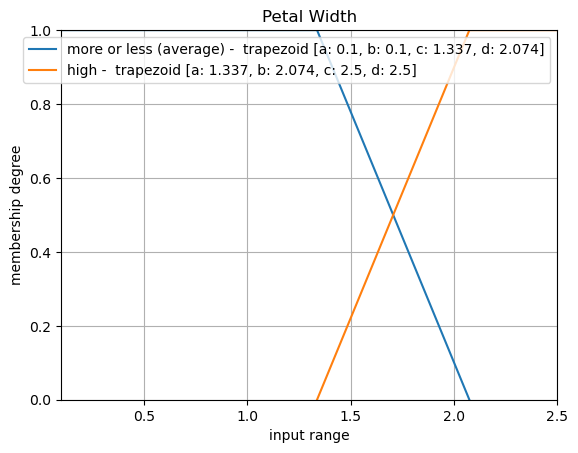

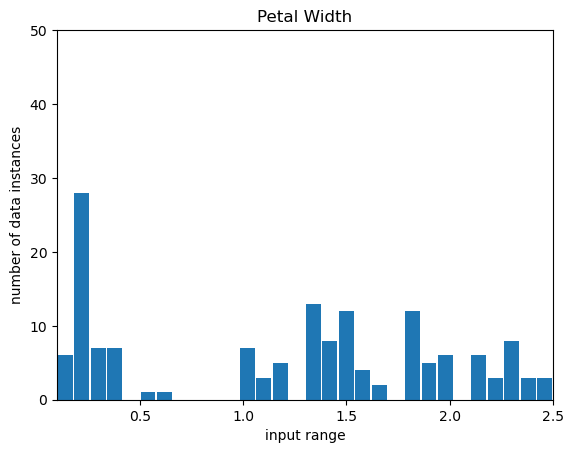


-----Information about Fuzzy Variable: Class-----

Class - domain[1.0, 3.0] - Accumulation:MAX; Defuzzifier:MOM - output
	1.0 -  singleton [a: 1.0]
	2.0 -  singleton [a: 2.0]
	3.0 -  singleton [a: 3.0]



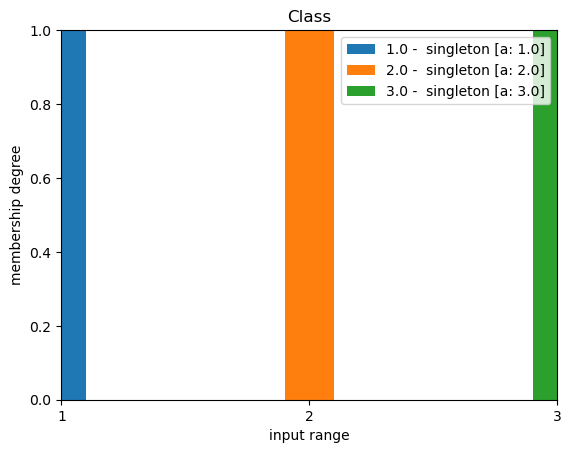

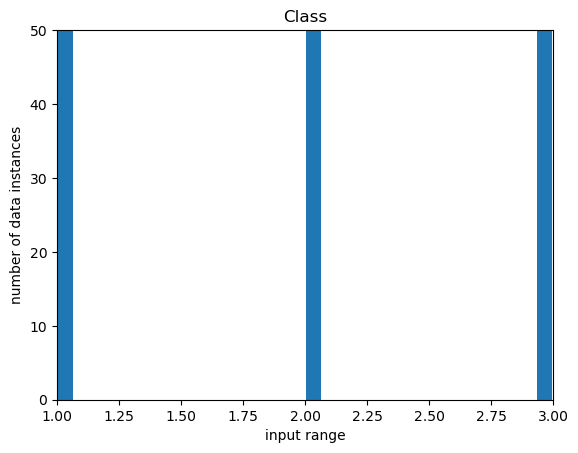

In [8]:
## this code is developed by Jose Maria Alonso-Moral and Pablo Miguel Perez-Ferreiro

# Same as above
fs_SP_FDTP_S_jfml_str_xml = "testlib/IRIS/training/IRIS.txt.kb.xml.SP.kb.xml.FDTP.kb.xml.S.kb.xml.jfml.xml"

fs_SP_FDTP_S = Py4jfml.load(fs_SP_FDTP_S_jfml_str_xml)
print(fs_SP_FDTP_S)

for var in fs_SP_FDTP_S.getVariables():
    print(f'\n-----Information about Fuzzy Variable: {var.getName()}-----\n')
    plot_fuzzy_variable(var)
    plot_histogram(var, iris_data.get(var.getName()), 30)

#### Exercise I2.2

Compare the features of these two new systems against the one we took as baseline (RP_FDTP_S):
- What differences appear in each case? Why?
- If you had to choose only one alternative, without further information, which would you choose? Why?

## 3.3 Inference with FIS

Now we will utilize our FIS to predict instances on the IRIS dataset. You will see how this approach is explainable-by-design, with fuzzy rules serving as explanations that are close to natural language due to the semantics endowed by fuzzy partitions (i.e., it is much easier to understand that a certain flower has high petal length than it is to know whether 5.3 is a high value for petal length or not). This is especially true when fuzzy partitions are hand-crafted by an expert (which, however, is not the case for the IRIS dataset). Because many rules can fire at once with different strength (as you will see below), one can take the competing rules as competing explanations, which help round out the outlook on the problem given by the model, compared to non-fuzzy alternatives.

For instance 145:
	Features: Petal Length = 5.2; Petal Width = 2.3; Class = 3.0
	Real output class ---> 3.0 (Virginica)
	Inferred class ---> 3.0(Virginica)
	Correct inference!
RULEBASE:
  RULE 1: rule2 - (0.1666667) IF Petal Length IS more or less (average) AND Petal Width IS average THEN Class IS 2.0 [weight=1.0]
  RULE 2: rule3 - (0.1666667) IF Petal Length IS high AND Petal Width IS average THEN Class IS 3.0 [weight=1.0]
  RULE 3: rule4 - (0.8333333) IF Petal Width IS high THEN Class IS 3.0 [weight=1.0]

Graphical view of rule2 - (0.1666667) IF Petal Length IS more or less (average) AND Petal Width IS average THEN Class IS 2.0 [weight=1.0]


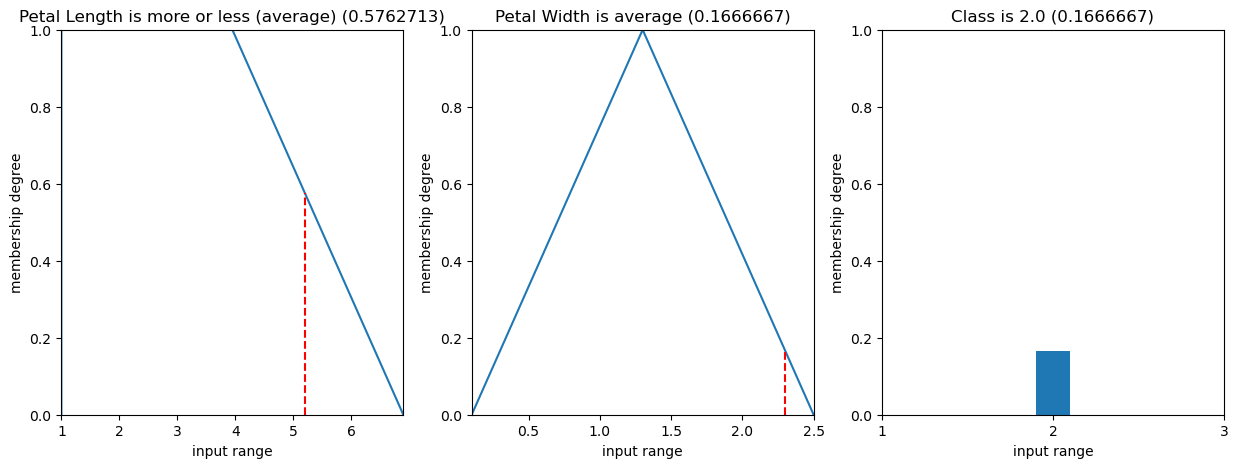

Graphical view of rule3 - (0.1666667) IF Petal Length IS high AND Petal Width IS average THEN Class IS 3.0 [weight=1.0]


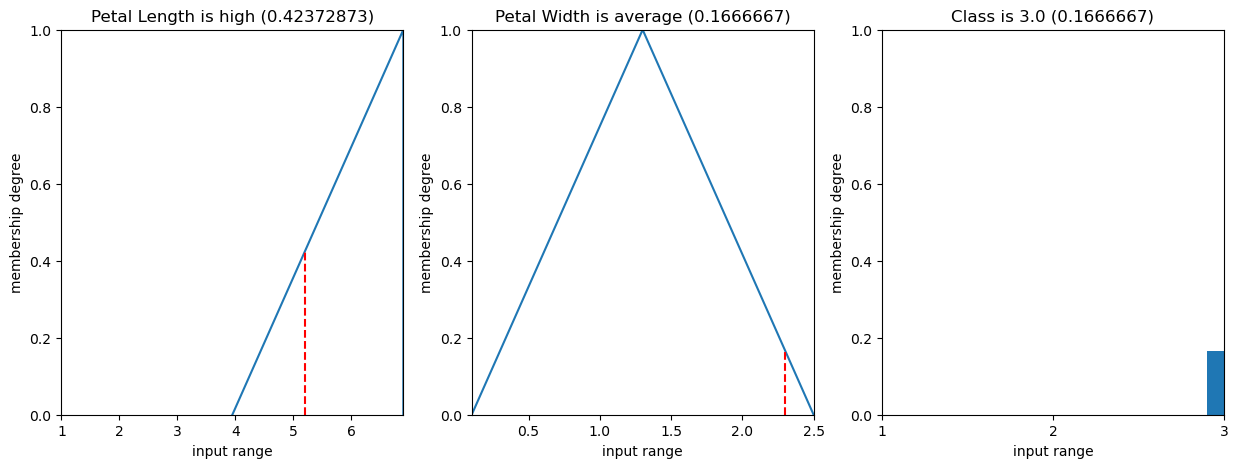

Graphical view of rule4 - (0.8333333) IF Petal Width IS high THEN Class IS 3.0 [weight=1.0]


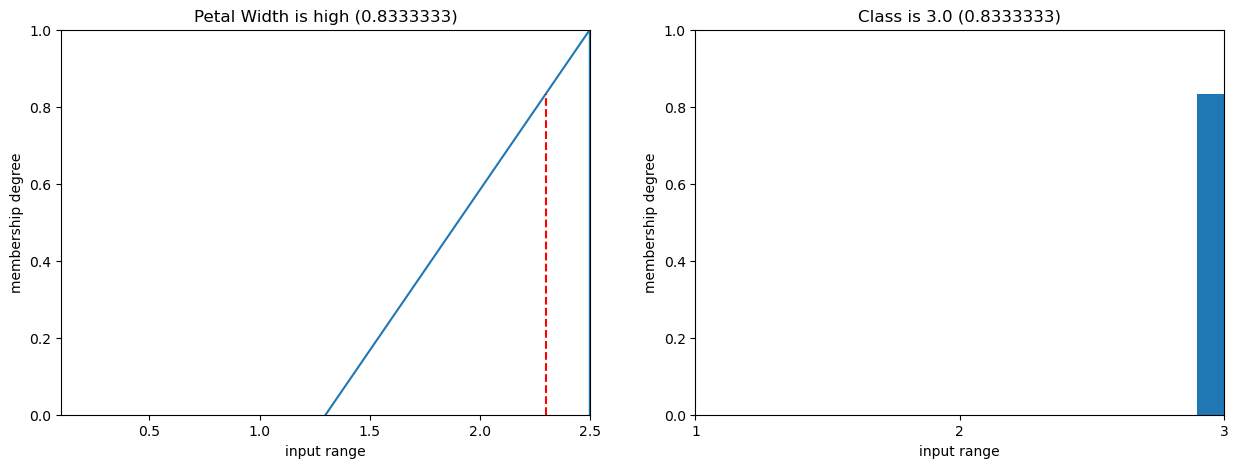

In [9]:
## this code is developed by Jose Maria Alonso-Moral and Pablo Miguel Perez-Ferreiro

# ID of the dataset instance we'll predict for
ins_id= 145

# We collect the FIS variables and set their values to those of the dataset instance
vars = fs_RP_FDTP_S.getVariables()
for v in vars:
  v.setValue(float(iris_data.get(v.getName())[ins_id]))

# Now that the FIS has the correct variable setup, we evaluate the rule base
fs_RP_FDTP_S.evaluate()
# This extracts the Class variable, which holds the inference result now
irisClass = fs_RP_FDTP_S.getVariable(iris_out_target)
# Extract the real Class
trueClass = iris_data.get(iris_out_target)[ins_id]

# Let's see how the inference and result looks like
print(f'For instance {ins_id}:')
print(f'\tFeatures: {"; ".join(var.getName() + " = " + str(var.getValue()) for var in vars)}')
print(f'\tReal output class ---> {str(trueClass)} ({iris_class_names[round(trueClass) - 1]})')
print(f'\tInferred class ---> {str(irisClass.getValue())}({iris_class_names[round(irisClass.getValue()) - 1]})')
print(f'\t{"Correct inference!" if round(float(trueClass)) == round(float(irisClass.getValue())) else "Incorrect inference!"}')
plot_fuzzy_rules(fs_RP_FDTP_S, True)

#### Exercise I2.3

Taking the code above as an example, replicate the inference using the alternative systems defined above (no simplification / induced partitions). Observe and discuss the results obtained. Which of the two modifications created a higher deviation from the baseline? You may predict for several instances if it helps you draw conclusions.

In [10]:
# Add you code here 


## 3.4 FIS vs. Models from I1

On the first practical, we used Decision Trees and Random Forests, with the DTs being interpretable-by-design and the RF being an opaque model. It seemed that, at least for the problem we were treating, DTs offered a better performance-interpretability tradeoff as they were similarly accurate to the RF while being much easier to understand. 

Now that we have more interpretable-by-design options in the form of FISs, we should check if any of them can prove superior to DTs in this new context.

Number of rules (RP-FDTP-S): Mean=4.0; Stdev=0.0
Number of rules (RP-FDTP): Mean=5.0; Stdev=0.0
Number of rules (SP-FDTP-S): Mean=4.5; Stdev=0.5
Number of leaves (Decision Tree): Mean=8.7; Stdev=0.9
Number of leaves (Decision Tree (Limited)): Mean=8.3; Stdev=0.9
Number of leaves (Random Forest): Mean=17.4; Stdev=1.8
Classification Ratio (RP-FDTP-S): Mean=0.94; Stdev=0.08
Classification Ratio (RP-FDTP): Mean=0.94; Stdev=0.08
Classification Ratio (SP-FDTP-S): Mean=0.97; Stdev=0.02
Classification Ratio (Decision Tree): Mean=0.95; Stdev=0.04
Classification Ratio (Decision Tree (Limited)): Mean=0.95; Stdev=0.04
Classification Ratio (Random Forest): Mean=0.96; Stdev=0.03


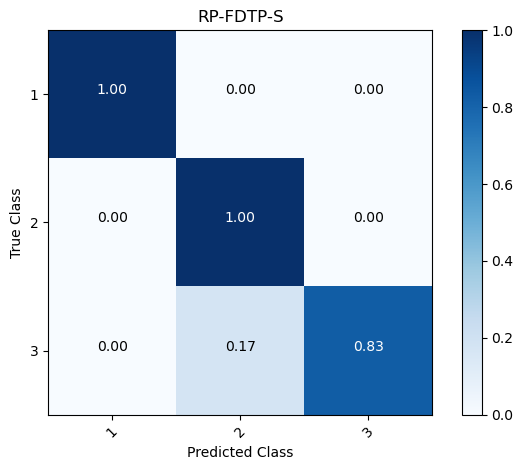

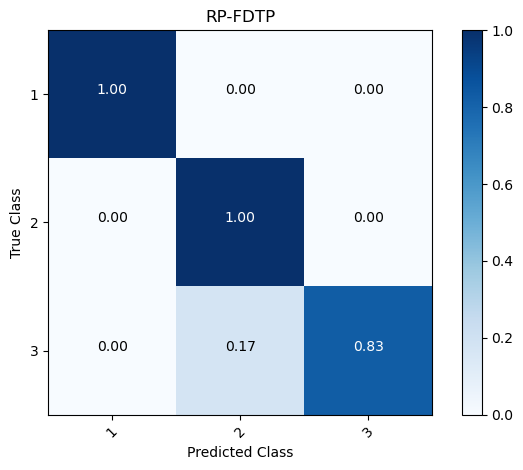

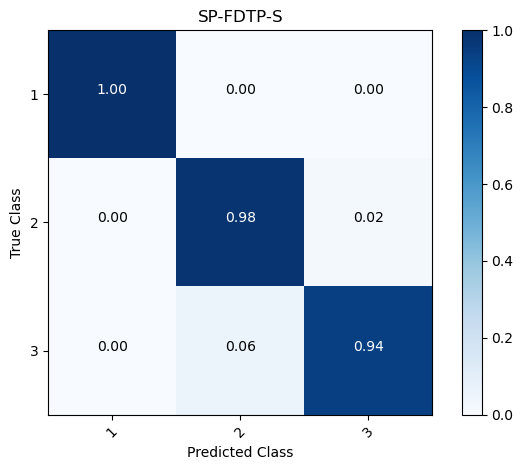

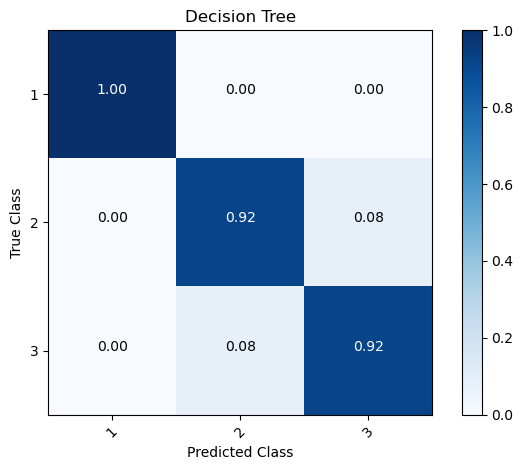

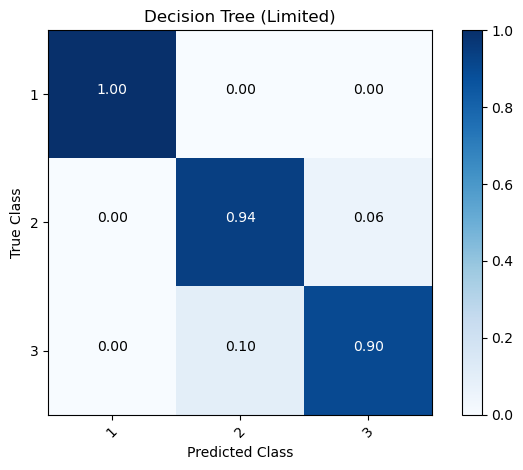

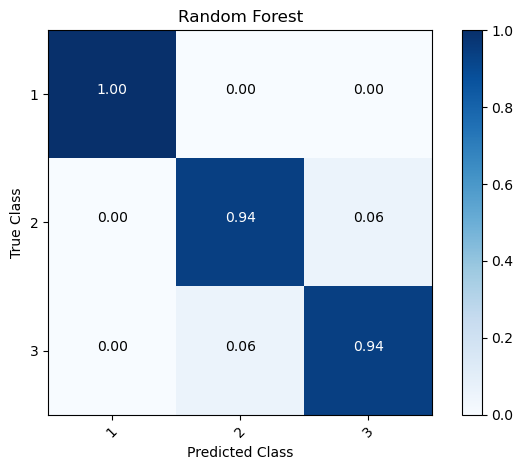

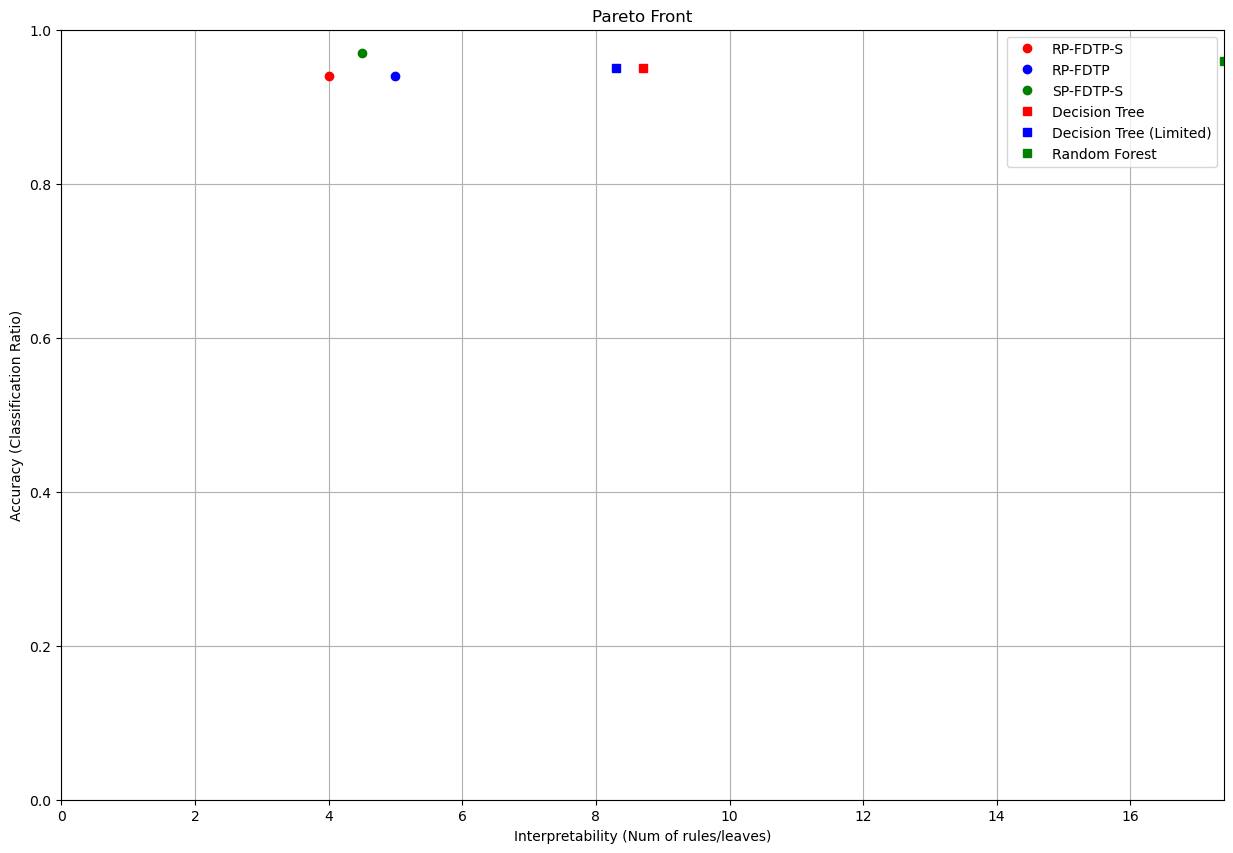

In [11]:
## this code is developed by Jose Maria Alonso-Moral and Pablo Miguel Perez-Ferreiro

# We define the number of folds, the data folder in which the cross validation function can find the required files, the model names and their files.
nFolds = 10
dataFolder = "IRIS"
model_names = ["RP-FDTP-S", "RP-FDTP", "SP-FDTP-S"]
file_names = ["IRIS.txt.kb.xml.RP.kb.xml.FDTP.kb.xml.S.kb.xml.jfml.xml", "IRIS.txt.kb.xml.RP.kb.xml.FDTP.kb.xml.jfml.xml", "IRIS.txt.kb.xml.SP.kb.xml.FDTP.kb.xml.S.kb.xml.jfml.xml"]

# We will build the ML models for comparison
ml_model_names = ["Decision Tree", "Decision Tree (Limited)", "Random Forest"]
ml_models = [tree.DecisionTreeClassifier(),
             tree.DecisionTreeClassifier(max_depth = 5),
             RandomForestClassifier(n_estimators=100, max_depth=3, random_state=0)]

# We call the analysis function
m_int, m_acc = cross_val_analysis(nFolds, dataFolder, ml_model_names, ml_models, model_names, file_names, iris_fnames, [iris_out_target], iris_numClasses)

# And plot the final results as a Pareto Front (you should be familiar with them by now, if not, check I1)
names = model_names + ml_model_names
plt.figure(figsize=[15,10])
plot_pareto_front(m_int, m_acc, names, max(m_int))

#### Exercise I2.4

Check the Pareto Front above:
- Why do you think the FIS may be placing above the DT in the tradeoff?
- Induced Partitions seems to be slightly better than Regular Partitions, at least in light of the results shown. Can you imagine a situation in which, with this same Pareto Front, the Regular Partitions alternative would be preferred? Why?

# 4. **Rule-based Natural Language Generation**

SimpleNLG is a Python library that allows for rule-based generation of natural language. While this approach has phased out of fashion due to the popularity of generative AI, it remains the premier alternative when one needs to be sure that the narratives being produced are fully controllable, free of hallucinations, and thus trustworthy. In this brief section, we will provide you with a very short introduction to how the library works, and how you could possibly use it to generate natural language explanations, something that we will see integrated with FIS in the next section.

**Note:** check the comments added to the code carefully to understand exactly what is going on at each step. The SimpleNLG library, despite its name, can be hard to understand at first. It is designed for computational linguistics and is very prone to verbosity (i.e., taking many lines of code for comparatively small results). The code below has been adapted for brevity, so the comments try to provide guidance on how to understand the process being followed.

In [12]:
## this code is developed by Jose Maria Alonso-Moral and Pablo Miguel Perez-Ferreiro

# Basics: define a sentence through its subject, verb and object
sentence = nlgFactory.createClause() # creates a generic clause
subj = nlgFactory.createNounPhrase("mouse") # creates a noun phrase with 'mouse' as its main component
subj.setDeterminer("the") # we set the determiner of 'mouse' to 'the'
sentence.setSubject(subj) # set the noun phrase as the subject of our clause
sentence.setVerb("chase") # set 'chase' as the verb of our clause
obj = nlgFactory.createNounPhrase("elephant") # we repeat the process followed with 'the mouse' for 'the elephant'
obj.setDeterminer("the")
sentence.setObject(obj) # and we set 'the elephant' as the object of the clause

# Up until this point, we have something like "the mouse/chase/the elephant", which follows the minimal "subject/verb/object" structuring
# We can do several things over this 'skeleton'; the simplest would be to realise it in diferent tenses, such:
print('-----Handling tense-----')
# Future tense
sentence.setFeature(Feature.TENSE, Tense.FUTURE) # the tense is a feature of the clause (sentence) itself
print(realiser.realiseSentence(sentence)) # the realiser resolves the different components of the clause into their actual, written forms (such as the correct tense for the verb)
# Past tense
sentence.setFeature(Feature.TENSE, Tense.PAST)
print(realiser.realiseSentence(sentence))
# Present tense
sentence.setFeature(Feature.TENSE, Tense.PRESENT)
print(realiser.realiseSentence(sentence))

# We can turn the sentence to the negative, or to different types of questions:
print('\n-----Handling negation and interrogation-----')
# Negating the sentence
sentence.setFeature(Feature.NEGATED, bool(True)) # similar to tense, negation is a feature of the clause
print(realiser.realiseSentence(sentence))
# "Who?"-type interrogation
sentence.setFeature(Feature.NEGATED, bool(False)) # we have to remove negation first
sentence.setFeature(Feature.INTERROGATIVE_TYPE, InterrogativeType.WHO_OBJECT) # set the clause to a Who question
print(realiser.realiseSentence(sentence))
# We can mix negation and interrogation, and switch the question type to Yes/No
sentence.setFeature(Feature.NEGATED, bool(True)) 
sentence.setFeature(Feature.INTERROGATIVE_TYPE, InterrogativeType.YES_NO)
print(realiser.realiseSentence(sentence))

# We can add adverbs or adjectives to the sentence
print('\n-----Handling adjectives and adverbs-----')
# Remove the previous features
sentence.setFeature(Feature.NEGATED, bool(False))
sentence.setFeature(Feature.INTERROGATIVE_TYPE, None)
# Add the new adjectives (for the verb, we need to turn it into a verb phrase so that we can apply the modifier)
subj.addModifier("fast") # modifier to the subject
verb = nlgFactory.createVerbPhrase("chase") # verb phrase with chase
sentence.setVerb(verb) # replace the hard-coded verb with the verb phrase
verb.addModifier("quickly") # modify the verb phrase
print(realiser.realiseSentence(sentence))
# Add an adverb of location through a prepositional phrase
place = nlgFactory.createNounPhrase("garden") # noun phrase for the place itself
place.setDeterminer("the") # add the determiner
pp = nlgFactory.createPrepositionPhrase() # prepositional phrase
pp.addComplement(place) # add the place as complement
pp.setPreposition("in") # set the preposition
sentence.addComplement(pp) # add the full prepositional phrase to the sentence, as an adverb of location
print(realiser.realiseSentence(sentence))

-----Handling tense-----
The mouse will chase the elephant.
The mouse chased the elephant.
The mouse chases the elephant.

-----Handling negation and interrogation-----
The mouse does not chase the elephant.
Who does the mouse chase?
Does the mouse not chase the elephant?

-----Handling adjectives and adverbs-----
The fast mouse quickly chases the elephant.
The fast mouse quickly chases the elephant in the garden.


In [13]:
## this code is developed by Jose Maria Alonso-Moral and Pablo Miguel Perez-Ferreiro

# There are easier ways of generating phrases if they are simple
print('\n-----Shorthand for simple clauses-----')
clause = nlgFactory.createClause("I", "be", "happy") # we define the subject, verb, object structure directly
print(realiser.realiseSentence(clause))

# We can leverage this kind of structure to create coordinated phrases...
print('\n-----Handling coordinated phrases-----')
s1 = nlgFactory.createClause("I", "like", "football") # several shorthand clauses
s2 = nlgFactory.createClause("my friend", "enjoy", "basketball")
s3 = nlgFactory.createClause("his sister", "prefer", "voleyball")
sentence = nlgFactory.createCoordinatedPhrase() # create a coordinated phrase, which is composed by several coordinate clauses
sentence.addCoordinate(s1) # add the coordinates
sentence.addCoordinate(s2)
sentence.addCoordinate(s3)
print(realiser.realiseSentence(sentence))

# Or explanations!
print('\n-----Handling explanatory structures-----')
consequent = nlgFactory.createClause("I", "be", "happy") # define a clause for the antecedent
antecedent = nlgFactory.createClause("I", "study", "AI") # and one for the antecedent
antecedent.setFeature(Feature.COMPLEMENTISER, "because") # complementise the antecedent with an explanatory particle
consequent.addComplement(antecedent) # set the antecedent as a complement to the consequent
print(realiser.realiseSentence(consequent))


-----Shorthand for simple clauses-----
I am happy.

-----Handling coordinated phrases-----
I like football, my friend enjoys basketball and his sister prefers voleyball.

-----Handling explanatory structures-----
I am happy because I study AI.


---

As mentioned, the SimpleNLG library can be used for explanatory purposes. Check below a possible structuring (although, do realise that the explanatory elements are hard-coded, which would not be so on a real system).

In [14]:
## this code is developed by Jose Maria Alonso-Moral and Pablo Miguel Perez-Ferreiro

print('\n-----Explanation example-----')

# The consequent can be a simple clause that states the output class
consequent = nlgFactory.createClause("The class", "be", "Virginica")

# Let's set up a confidence level for the output
conf = nlgFactory.createNounPhrase("confidence") # noun phrase for confidence
conf.addModifier("high") # whatever modifier needed, for example high
pp = nlgFactory.createPrepositionPhrase() # prepositional phrase to join the confidence level with the consequent
pp.addComplement(conf) # the confidence is the complement
pp.setPreposition("with") # set the preposition
consequent.addComplement(pp) # and add the prepositional phrase as a consequent complement

# Now prepare the antecedent
antecedent = nlgFactory.createClause() 
antecedent.setFeature(Feature.COMPLEMENTISER, "because") # of course, this is complementised with an explanatory particle

# The elements of the antecedent can be boiled down to a coordinated phrase, with each factor a coordinate
ant_elements = nlgFactory.createCoordinatedPhrase()
ant_elements.addCoordinate(nlgFactory.createClause("petal width", "be", "high"))
ant_elements.addCoordinate(nlgFactory.createClause("petal length", "be", "low"))
ant_elements.addCoordinate(nlgFactory.createClause("sepal width", "be", "high"))

# If any factor is more complex, you can add it in the 'longer' way
complex_element = nlgFactory.createClause() 
complex_element.setVerb("be")
complex_element.setSubject("sepal length")
obj = nlgFactory.createNounPhrase("low")
obj.addModifier("very")
complex_element.setObject(obj)
ant_elements.addCoordinate(complex_element)

# Join everything together
antecedent.setVerb(ant_elements) # We set the antecedent elements as the verb of the antecedent clause; this may seem a bit strange, but works the best
consequent.addComplement(antecedent) # We set the antecedent as a complement for the consequent
print(realiser.realiseSentence(consequent))


-----Explanation example-----
The class is Virginica with high confidence because petal width is high, petal length is low, sepal width is high and sepal length is very low.


# 5. **FIS + NLG: Natural Language Explanations!**

To conclude this practical session, we will take a look at a library that combines both the explanatory/predictive power of FIS with the rule-based verbalization of SimpleNLG to create a suite that allows user to create textual explanations for their models, in factual and counterfactual form. The library works based on algorithms published in:

* Ilia Stepin‚ Alejandro Catala‚ Martin Pereira-Fariña‚ Jose M. Alonso, [Factual and Counterfactual Explanation of Fuzzy Information Granules](http://doi.org/10.1007/978-3-030-64949-4_6), Interpretable Artificial Intelligence: A Perspective of Granular Computing, pp. 153–185, Springer-Verlag, 2021.

The associated code is available at [fcfexpgen-code](https://gitlab.citius.usc.es/ilia.stepin/fcfexpgen) (it is already included in your workspace; if it is not, you may need to update your TXAI folder to the latest version provided).

You'll see a lot of function calls on the example code you may not recognize, but it is OK: you can find those functions on the *interactive2.py* file of your *auxiliary* folder (within the workspace), under the section marked as **Generation of Factual/Counterfactual Explanations**. It is worth noting that this code is part of [Ilia Stepin's PhD dissertation](http://hdl.handle.net/10347/31084).

**What does a counterfactual explanation entail?** In short, it is a explanatory mode in which you explain why something did **not** take place, by describing the features that would have to change (and how) in order for it to truly happen. For our purposes, a counterfactual explanations details what combination of features would have lead to the inference system predicting a certain output class it did not actually choose.

For this last part of the practical, we will change the dataset we're working with, so that explanations are a bit richer. We will be using the **BEER** [dataset](https://gitlab.citius.usc.es/jose.alonso/xai/-/blob/master/BEER3.txt.aux.arff), which contains 400 instances, with 50 instances associated with each one of 8 beer styles (Blanche, Lager, Pilsner, IPA, Stout, Barleywine, Porter, and Belgian Strong Ale). The features (Color, Strength, Bitterness) were defined by an expert. This dataset was first introduced in: 
* G. Castellano, C. Castiello, and A. M. Fanelli, [The FISDeT software: Application to beer style classification](https://doi.org/10.1109/FUZZ-IEEE.2017.8015503), in IEEE International Conference on Fuzzy Systems (FUZZ-IEEE), Naples, Italy, 2017. 

In [15]:
## this code is developed by Jose Maria Alonso-Moral and Pablo Miguel Perez-Ferreiro

# Definition of the BEER dataset characteristics

beer_fnames = ["Color", "Bitterness", "Strength"]
beer_out_target = "Class"
beer_vnames = beer_fnames + [beer_out_target]
beer_numClasses = 8
beer_class_names = ['Blanche','Lager','Pilsner','IPA','Stout','Barleywine','Porter','Belgian-Strong-Ale']


FUZZY SYSTEM: New Knowledge Base - MAMDANI
KNOWLEDGEBASE: 
  *Color - domain[0.0, 45.0] - input
	Pale -  trapezoid [a: 0.0, b: 0.0, c: 0.0, d: 9.0]
	Straw -  triangular [a: 0.0, b: 9.0, c: 18.0]
	Amber -  triangular [a: 9.0, b: 18.0, c: 27.0]
	Brown -  triangular [a: 18.0, b: 27.0, c: 36.0]
	Black -  trapezoid [a: 27.0, b: 36.0, c: 45.0, d: 45.0]
	(Straw) OR (Amber) -  trapezoid [a: 0.0, b: 9.0, c: 18.0, d: 27.0]
	(Amber) OR (Brown) -  trapezoid [a: 9.0, b: 18.0, c: 27.0, d: 36.0]

  *Bitterness - domain[8.0, 250.0] - input
	Low -  trapezoid [a: 8.0, b: 8.0, c: 8.0, d: 56.4]
	High -  trapezoid [a: 8.0, b: 56.4, c: 250.0, d: 250.0]

  *Strength - domain[0.039, 0.136] - input
	Session -  trapezoid [a: 0.039, b: 0.039, c: 0.039, d: 0.058]
	Standard -  triangular [a: 0.039, b: 0.058, c: 0.078]
	High -  triangular [a: 0.058, b: 0.078, c: 0.097]
	Very high -  trapezoid [a: 0.078, b: 0.097, c: 0.136, d: 0.136]
	(Session) OR (Standard) -  trapezoid [a: 0.039, b: 0.039, c: 0.058, d: 0.078]
	(H

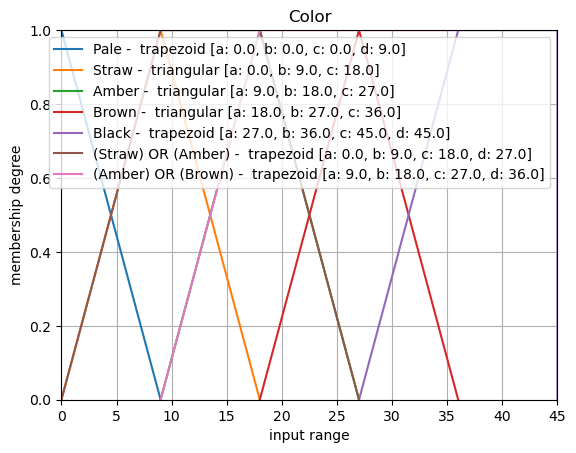

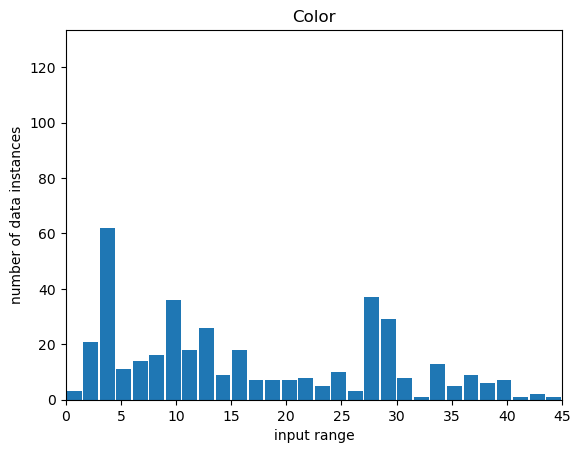


-----Information about Fuzzy Variable: Bitterness-----

Bitterness - domain[8.0, 250.0] - input
	Low -  trapezoid [a: 8.0, b: 8.0, c: 8.0, d: 56.4]
	High -  trapezoid [a: 8.0, b: 56.4, c: 250.0, d: 250.0]



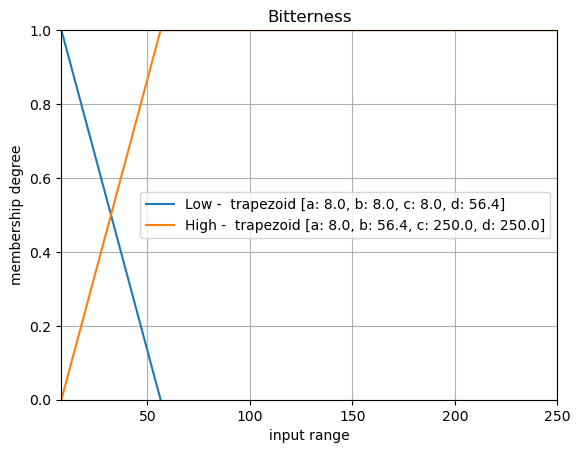

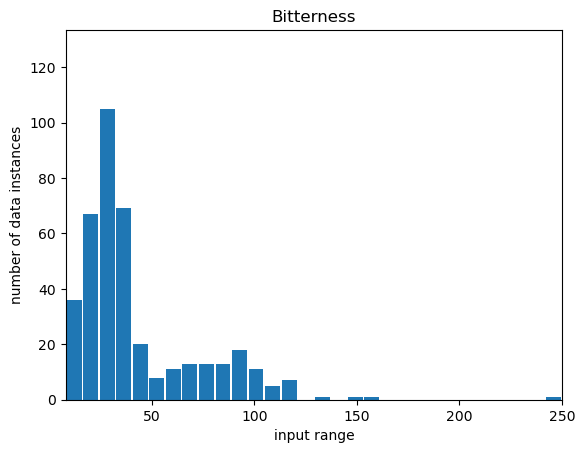


-----Information about Fuzzy Variable: Strength-----

Strength - domain[0.039, 0.136] - input
	Session -  trapezoid [a: 0.039, b: 0.039, c: 0.039, d: 0.058]
	Standard -  triangular [a: 0.039, b: 0.058, c: 0.078]
	High -  triangular [a: 0.058, b: 0.078, c: 0.097]
	Very high -  trapezoid [a: 0.078, b: 0.097, c: 0.136, d: 0.136]
	(Session) OR (Standard) -  trapezoid [a: 0.039, b: 0.039, c: 0.058, d: 0.078]
	(High) OR (Very high) -  trapezoid [a: 0.058, b: 0.078, c: 0.136, d: 0.136]



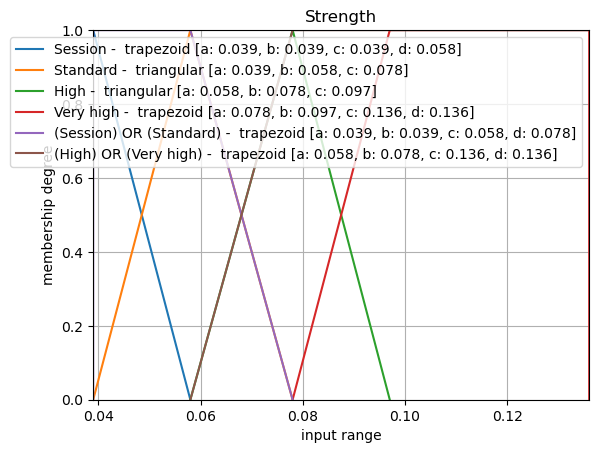

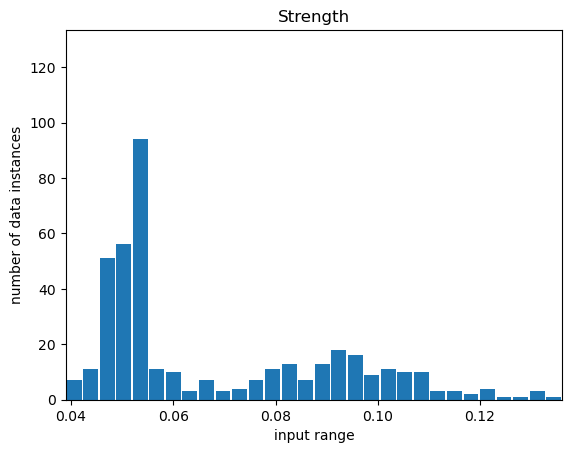


-----Information about Fuzzy Variable: Class-----

Class - domain[1.0, 8.0] - Accumulation:MAX; Defuzzifier:MOM - output
	Blanche -  singleton [a: 1.0]
	Lager -  singleton [a: 2.0]
	Pilsner -  singleton [a: 3.0]
	IPA -  singleton [a: 4.0]
	Stout -  singleton [a: 5.0]
	Barleywine -  singleton [a: 6.0]
	Porter -  singleton [a: 7.0]
	Belgian-Strong-Ale -  singleton [a: 8.0]



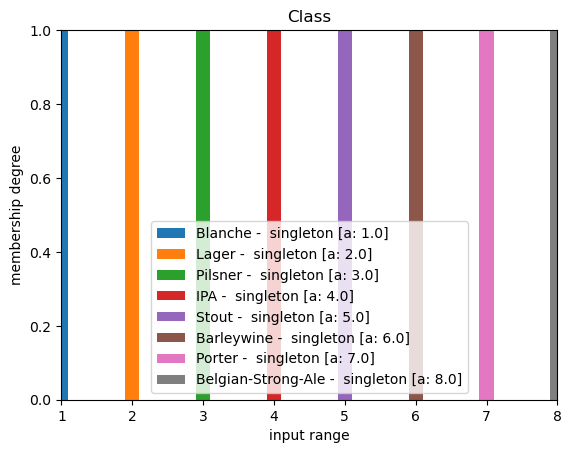

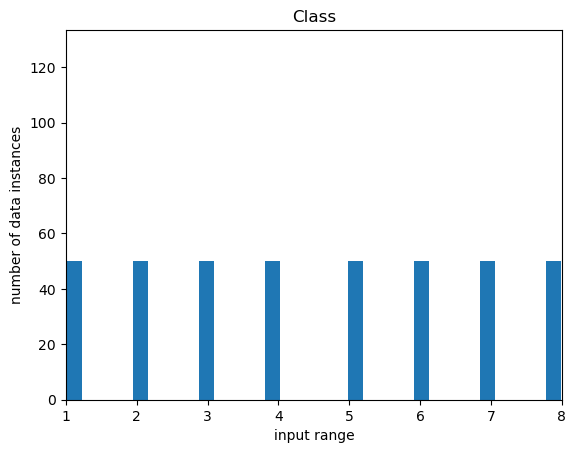

In [16]:
## this code is developed by Jose Maria Alonso-Moral and Pablo Miguel Perez-Ferreiro

# Importing the dataset itself and the FIS
beer_data= pd.read_csv("testlib/BEER/training/BEER.txt", header=0, names=beer_vnames)
beer_RP_FDTP_S_jfml_str_xml = "testlib/BEER/training/BEER.txt.kb.xml.RP.kb.xml.FDTP.kb.xml.S.kb.xml.jfml.xml"
beer_RP_FDTP_S = Py4jfml.load(beer_RP_FDTP_S_jfml_str_xml)

# Print basic information about the FIS
print(beer_RP_FDTP_S)

for var in beer_RP_FDTP_S.getVariables():
    print(f'\n-----Information about Fuzzy Variable: {var.getName()}-----\n')
    plot_fuzzy_variable(var)
    plot_histogram(var, beer_data.get(var.getName()), 30)

INFERENCE AS WE WERE DOING PREVIOUSLY

For instance 320:
	Features: Color = 22.0; Bitterness = 25.0; Strength = 0.045; Class = 7.0
	Real output class ---> 7 (Porter)
	Inferred class ---> 7.0(Porter)
	Correct inference!
RULEBASE:
  RULE 1: rule6 - (1.0) IF Color IS (Amber) OR (Brown) AND Strength IS (Session) OR (Standard) THEN Class IS Porter [weight=1.0]

Graphical view of rule6 - (1.0) IF Color IS (Amber) OR (Brown) AND Strength IS (Session) OR (Standard) THEN Class IS Porter [weight=1.0]


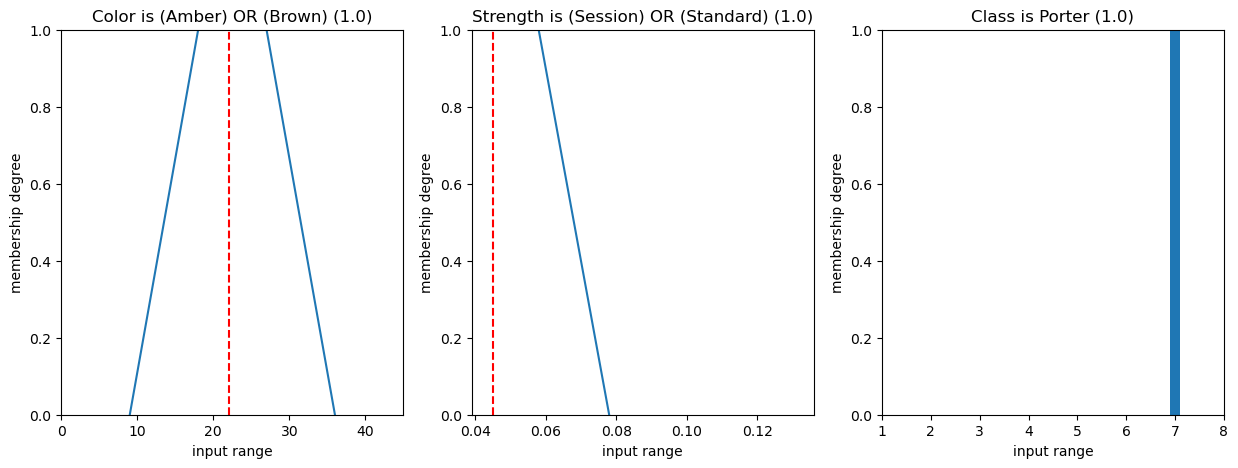


INFERENCE AND EXPLANATION BY FCFEXPGEN

Test instance features:
[('Color', 22.0), ('Bitterness', 25.0), ('Strength', 0.045), ('Class', 7.0)]
True class: Porter
Predicted class: Porter

Factual explanation:

The test instance is of class porter because color is (amber) or (brown) and strength is (session) or (standard).

Counterfactual explanations:

The test instance would be of class blanche if color were pale and bitterness were low.
The test instance would be of class lager if color were straw, bitterness were low and strength were standard.
The test instance would be of class pilsner if color were pale and bitterness were high.
The test instance would be of class ipa if color were straw or amber and strength were high.
The test instance would be of class stout if color were black.
The test instance would be of class barleywine if color were straw or amber and strength were very high.
The test instance would be of class belgian-strong-ale if color were brown and strength were high 

In [17]:
## this code is developed by Jose Maria Alonso-Moral and Pablo Miguel Perez-Ferreiro

# ID of the dataset instance we'll predict for
ins_id= 320 

# The FCFEXPGEN library will need this
values = []
names = []

# We collect the FIS variables and set their values to those of the dataset instance, also we store them for the library call (later)
vars = beer_RP_FDTP_S.getVariables()
for v in vars:
    names.append(v.getName())
    values.append(float(beer_data.get(v.getName())[ins_id]))
    v.setValue(float(beer_data.get(v.getName())[ins_id]))

# Evaluate the rule base
beer_RP_FDTP_S.evaluate()
# Get the inference results and the real class
beerClass = beer_RP_FDTP_S.getVariable(beer_out_target)
trueClass = beer_data.get(beer_out_target)[ins_id]

# Plot the inference process as we were doing previously...
print("INFERENCE AS WE WERE DOING PREVIOUSLY\n")
print(f'For instance {ins_id}:')
print(f'\tFeatures: {"; ".join(var.getName() + " = " + str(var.getValue()) for var in vars)}')
print(f'\tReal output class ---> {str(trueClass)} ({beer_class_names[round(trueClass) - 1]})')
print(f'\tInferred class ---> {str(beerClass.getValue())}({beer_class_names[round(beerClass.getValue()) - 1]})')
print(f'\t{"Correct inference!" if round(float(trueClass)) == round(float(beerClass.getValue())) else "Incorrect inference!"}')
plot_fuzzy_rules(beer_RP_FDTP_S, True)

# And now the verbal explanations coming from FCFEXPGEN!
print("\nINFERENCE AND EXPLANATION BY FCFEXPGEN\n")
generate_counterfactuals(values, names, true_class=str(float(trueClass)), 
                         xml_filename=beer_RP_FDTP_S_jfml_str_xml, json_filename="testlib/BEER/BEER.json", linguistic_terms_known=True)

#### Exercise I2.5

You have, just above, a complete, comprehensive example on how to define, import and predict/explain for a given problem. Now, using the [GUAJE online tool](https://guaje-online.app.citius.gal/), for which your teachers should have given you access instructions (see the beginning of this notebook), create your own FIS for the PIMA dataset you employed on the previous practical session (you don't need to download it, Online GUAJE already has it pre-loaded). Integrate it into your workspace, and then repeat the task above with it to generate some explanations. Would you prefer this alternative to the SHAP/Visual approaches we used on the previous practical? Why?

**Note:** While we're asking you to compare this new approach with the previous ones, that does not mean you need to repeat any task already done on I1 on this notebook. Just general commentary is enough.

In [18]:
# Add you code here 
